Animação 1 salva em: /home/mateus-band/venv/codes/listas/Calc2/animacao_arbitraria.gif
Animação 2 salva em: /home/mateus-band/venv/codes/listas/Calc2/animacao_vetores_unitarios.gif


Animation with 63 frames
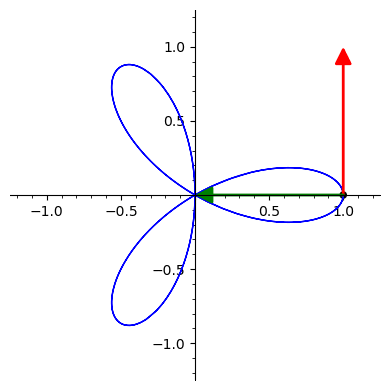

In [ ]:
%matplotlib inline

import os

var('t')
alpha = vector([cos(3*t)*cos(t), cos(3*t)*sin(t)])

alpha_p = alpha.diff(t)
alpha_pp = alpha.diff(t, 2)

plot_curva = parametric_plot(alpha, (t, 0, 2*pi), color='blue')

frames_arbitraria = []
for t0 in srange(0, 2*pi, 0.1):
    ponto_atual = alpha.subs(t=t0)
    v1 = alpha_p.subs(t=t0)
    v2 = alpha_pp.subs(t=t0)

    ponto_plot = point(ponto_atual, color='black', size=30)
    vetor1_plot = arrow(ponto_atual, ponto_atual + v1*0.2, color='red')
    vetor2_plot = arrow(ponto_atual, ponto_atual + v2*0.2, color='green')
    
    frame_atual = plot_curva + ponto_plot + vetor1_plot + vetor2_plot
    frame_atual.set_aspect_ratio(1)
    frames_arbitraria.append(frame_atual)

anim_arbitraria = animate(frames_arbitraria, xmin=-1.2, xmax=1.2, ymin=-1.2, ymax=1.2)
gif_path_1 = os.path.join(os.getcwd(), 'animacao_arbitraria.gif')
anim_arbitraria.gif(savefile=gif_path_1)
print(f"Animação 1 salva em: {gif_path_1}")

T = alpha_p / alpha_p.norm()
alpha_pp_s = T.diff(t) / alpha_p.norm()
N = alpha_pp_s / alpha_pp_s.norm()

frames_arco = []
for t0 in srange(0, 2*pi, 0.1):
    ponto_atual = alpha.subs(t=t0)
    v1_s = T.subs(t=t0)
    v2_s_unitario = N.subs(t=t0)

    ponto_plot = point(ponto_atual, color='black', size=30)
    vetor1_s_plot = arrow(ponto_atual, ponto_atual + v1_s, color='red')
    vetor2_s_plot = arrow(ponto_atual, ponto_atual + v2_s_unitario, color='green')

    frame_atual = plot_curva + ponto_plot + vetor1_s_plot + vetor2_s_plot
    frame_atual.set_aspect_ratio(1)
    frames_arco.append(frame_atual)

anim_arco = animate(frames_arco, xmin=-1.2, xmax=1.2, ymin=-1.2, ymax=1.2)
gif_path_2 = os.path.join(os.getcwd(), 'animacao_vetores_unitarios.gif')
anim_arco.gif(savefile=gif_path_2)
print(f"Animação 2 salva em: {gif_path_2}")

anim_arbitraria.show()
anim_arco.show()

In [ ]:
#Questão 9

var('t')

#definição da curva de lissajous
curva_x = sin(3*t)
curva_y = sin(2*t)

#calculo do vetor tangente untario
dx = diff(curva_x, t)
dy = diff(curva_y, t)
magnitude = sqrt(dx^2 + dy^2)

Tx = (dx / magnitude).simplify_full()
Ty = (dy / magnitude).simplify_full()

@interact
def plota_indicatriz(t0=slider(0, 2*pi, step_size=0.02, default=0, label="Valor de t")):

    Px = curva_x.subs(t=t0)
    Py = curva_y.subs(t=t0)
    P_ponto = (Px, Py)
    
    T_vec_x = Tx.subs(t=t0)
    T_vec_y = Ty.subs(t=t0)

    centro_indicatriz = (0, 0)
    escala_indicatriz = 1 

    ponto_indicatriz_x = centro_indicatriz[0] + escala_indicatriz * T_vec_x
    ponto_indicatriz_y = centro_indicatriz[1] + escala_indicatriz * T_vec_y
    ponto_indicatriz = (ponto_indicatriz_x, ponto_indicatriz_y)


    plot_curva = parametric_plot((curva_x, curva_y), (t, 0, 2*pi), color='pink', thickness=1.5, plot_points=200)
    
    plot_circulo = circle(centro_indicatriz, escala_indicatriz, color='black', linestyle='--')
    plot_ponto_P = point(P_ponto, color='black', size=20, zorder=10)
    plot_ponto_T = point(ponto_indicatriz, color='red', size=30, zorder=10)
    P_final_vetor = (Px + T_vec_x, Py + T_vec_y)
    plot_vetor_em_P = arrow(P_ponto, P_final_vetor, color='red', width=2, arrowsize=3)
    plot_vetor_na_indicatriz = arrow(centro_indicatriz, ponto_indicatriz, color='red', width=2, arrowsize=4)
    plot_linha_conexao = line([P_ponto, ponto_indicatriz], linestyle=':', color='gray')
    
    pos_texto_P = (Px + 0.15, Py + 0.15)
    pos_texto_T = (ponto_indicatriz_x * 1.3, ponto_indicatriz_y * 1.3)
    texto_P = text("P", pos_texto_P, color='black', fontsize=12)
    texto_T = text("T", pos_texto_T, color='red', fontsize=12)

    grafico_final = (plot_curva + plot_circulo + plot_ponto_P + plot_ponto_T +
                     plot_vetor_em_P + plot_vetor_na_indicatriz +
                     plot_linha_conexao + texto_P + texto_T)
    
    grafico_final.set_aspect_ratio(1)
    grafico_final.show(xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5,
                       axes_labels=['x', 'y'])

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Animação da curva α(t) salva em: /home/mateus-band/venv/codes/listas/Calc2/animacao_alpha.gif


Animation with 42 frames
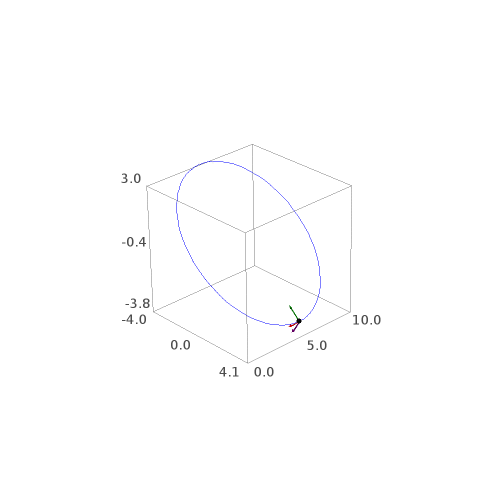

Animação da curva β(t) salva em: /home/mateus-band/venv/codes/listas/Calc2/animacao_beta.gif


Animation with 63 frames
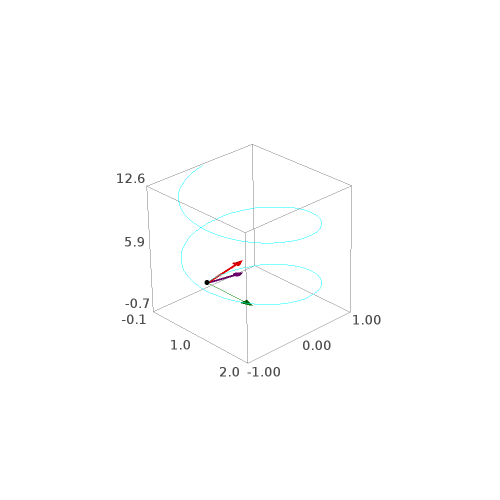

In [ ]:
#Questão 13

%matplotlib inline

import os

#item a)
var('t')
alpha = vector([4*cos(t), 5 - 5*sin(t), -3*cos(t)])

alpha_p = alpha.diff(t)
alpha_pp = alpha.diff(t, 2)

T_alpha = alpha_p / alpha_p.norm()
N_alpha = T_alpha.diff(t) / T_alpha.diff(t).norm()
B_alpha = T_alpha.cross_product(N_alpha)

plot_curva_alpha = parametric_plot3d(alpha, (t, 0, 2*pi), color='blue')

frames_alpha = []
for t0 in srange(0, 2*pi, 0.15):
    ponto_atual = alpha.subs(t=t0)
    T_vec = T_alpha.subs(t=t0)
    N_vec = N_alpha.subs(t=t0)
    B_vec = B_alpha.subs(t=t0)

    ponto_plot = point3d(ponto_atual, color='black', size=10)
    vetor_T = arrow3d(ponto_atual, ponto_atual + T_vec, color='red')
    vetor_N = arrow3d(ponto_atual, ponto_atual + N_vec, color='green')
    vetor_B = arrow3d(ponto_atual, ponto_atual + B_vec, color='purple')
    
    frame_atual = plot_curva_alpha + ponto_plot + vetor_T + vetor_N + vetor_B
    frames_alpha.append(frame_atual)

anim_alpha = animate(frames_alpha)
gif_path_alpha = os.path.join(os.getcwd(), 'animacao_alpha.gif')
anim_alpha.gif(savefile=gif_path_alpha, delay=10)
print(f"Animação da curva α(t) salva em: {gif_path_alpha}")
anim_alpha.show()


#item b)
beta = vector([1 - cos(t), sin(t), t])

beta_p = beta.diff(t)
beta_pp = beta.diff(t, 2)

T_beta = beta_p / beta_p.norm()
N_beta = T_beta.diff(t) / T_beta.diff(t).norm()
B_beta = T_beta.cross_product(N_beta)

plot_curva_beta = parametric_plot3d(beta, (t, 0, 4*pi), color='darkblue')

frames_beta = []
for t0 in srange(0, 4*pi, 0.2):
    ponto_atual = beta.subs(t=t0)
    T_vec = T_beta.subs(t=t0)
    N_vec = N_beta.subs(t=t0)
    B_vec = B_beta.subs(t=t0)

    ponto_plot = point3d(ponto_atual, color='black', size=10)
    vetor_T = arrow3d(ponto_atual, ponto_atual + T_vec, color='red')
    vetor_N = arrow3d(ponto_atual, ponto_atual + N_vec, color='green')
    vetor_B = arrow3d(ponto_atual, ponto_atual + B_vec, color='purple')

    frame_atual = plot_curva_beta + ponto_plot + vetor_T + vetor_N + vetor_B
    frames_beta.append(frame_atual)

anim_beta = animate(frames_beta)
gif_path_beta = os.path.join(os.getcwd(), 'animacao_beta.gif')
anim_beta.gif(savefile=gif_path_beta, delay=10)
print(f"Animação da curva β(t) salva em: {gif_path_beta}")
anim_beta.show()

Animação da curva α(t) salva em: /home/mateus-band/venv/codes/listas/Calc2/animacao_planos_alpha.gif


Animation with 36 frames
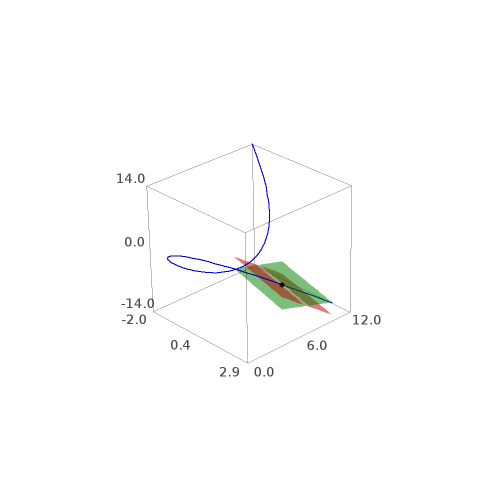

Animação da curva β(t) salva em: /home/mateus-band/venv/codes/listas/Calc2/animacao_planos_beta.gif


Animation with 42 frames
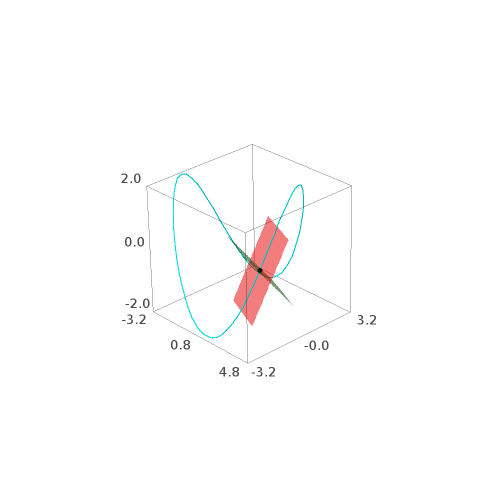

In [11]:
#Questão 15 (Extra)

%matplotlib inline

import os

#item a)
var('t, u, v')
alpha = vector([3*t - t^3, 3*t^2, 3*t + t^3])

alpha_p = alpha.diff(t)
alpha_pp = alpha.diff(t, 2)

T_alpha = alpha_p / alpha_p.norm()
N_alpha = T_alpha.diff(t) / T_alpha.diff(t).norm()
B_alpha = T_alpha.cross_product(N_alpha)

plot_curva_alpha = parametric_plot3d(alpha, (t, -2, 2), color='blue', thickness=2)

frames_alpha = []
for t0 in srange(-1.8, 1.8, 0.1):
    ponto_atual = alpha.subs(t=t0)
    T_vec = T_alpha.subs(t=t0)
    N_vec = N_alpha.subs(t=t0)
    B_vec = B_alpha.subs(t=t0)

    ponto_plot = point3d(ponto_atual, color='black', size=10)
    
    plano_osculador = parametric_plot3d(ponto_atual + u*T_vec + v*N_vec, (u, -2, 2), (v, -2, 2), color='red', opacity=0.5)
    plano_normal = parametric_plot3d(ponto_atual + u*N_vec + v*B_vec, (u, -2, 2), (v, -2, 2), color='green', opacity=0.5)

    frame_atual = plot_curva_alpha + ponto_plot + plano_osculador + plano_normal
    frames_alpha.append(frame_atual)

anim_alpha = animate(frames_alpha)
gif_path_alpha = os.path.join(os.getcwd(), 'animacao_planos_alpha.gif')
anim_alpha.gif(savefile=gif_path_alpha, delay=10)
print(f"Animação da curva α(t) salva em: {gif_path_alpha}")
anim_alpha.show()


#item b)
var('a, b, c')
a_val, b_val, c_val = 3, 1, 2
beta = vector([a*cos(t) + b*sin(t), a*sin(t) - b*cos(t), c*sin(2*t)]).subs(a=a_val, b=b_val, c=c_val)

beta_p = beta.diff(t)
beta_pp = beta.diff(t, 2)

T_beta = beta_p / beta_p.norm()
N_beta = T_beta.diff(t) / T_beta.diff(t).norm()
B_beta = T_beta.cross_product(N_beta)

plot_curva_beta = parametric_plot3d(beta, (t, 0, 2*pi), color='cyan', thickness=2)

frames_beta = []
for t0 in srange(0, 2*pi, 0.15):
    ponto_atual = beta.subs(t=t0)
    T_vec = T_beta.subs(t=t0)
    N_vec = N_beta.subs(t=t0)
    B_vec = B_beta.subs(t=t0)
    
    ponto_plot = point3d(ponto_atual, color='black', size=10)
    
    plano_osculador = parametric_plot3d(ponto_atual + u*T_vec + v*N_vec, (u, -1.5, 1.5), (v, -1.5, 1.5), color='red', opacity=0.5)
    plano_normal = parametric_plot3d(ponto_atual + u*N_vec + v*B_vec, (u, -1.5, 1.5), (v, -1.5, 1.5), color='green', opacity=0.5)

    frame_atual = plot_curva_beta + ponto_plot + plano_osculador + plano_normal
    frames_beta.append(frame_atual)

anim_beta = animate(frames_beta)
gif_path_beta = os.path.join(os.getcwd(), 'animacao_planos_beta.gif')
anim_beta.gif(savefile=gif_path_beta, delay=10)
print(f"Animação da curva β(t) salva em: {gif_path_beta}")
anim_beta.show()